In [1]:
print('Hello World')

Hello World


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
url='https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
fuel_data = pd.read_csv(url, error_bad_lines=False)
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2018_12_44_0_2,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [4]:

fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [5]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [6]:
#Which feature has missing values and what is the total number of missing value and percentage of the missing
#rows as a factor of the total number of rows in three decimal places?
fuel_data.isnull().sum().sort_values()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
fuel_unit                       180
dtype: int64

In [7]:
#The feature with missing values falls under what category? What missing value imputation technique would you use?
fuel_data.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [8]:
#Which year has the highest average fuel cost per unit delivered
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [9]:
fuel_data.mean()

utility_id_ferc1                1.186018e+02
report_year                     2.005806e+03
fuel_qty_burned                 2.622119e+06
fuel_mmbtu_per_unit             8.492111e+00
fuel_cost_per_unit_burned       2.086490e+02
fuel_cost_per_unit_delivered    9.175704e+02
fuel_cost_per_mmbtu             1.930435e+01
dtype: float64

In [10]:
#Which year has the highest average fuel cost per unit delivered?1997
fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].sum()

report_year
1994    7.859053e+04
1995    3.931506e+04
1996    1.000602e+07
1997    1.218738e+07
1998    3.178799e+05
1999    2.682921e+04
2000    1.352903e+06
2001    8.142834e+04
2002    5.735121e+04
2003    6.740849e+04
2004    1.663129e+05
2005    5.258506e+04
2006    4.805125e+04
2007    5.476283e+04
2008    7.194631e+04
2009    7.975923e+05
2010    1.158381e+05
2011    7.412059e+04
2012    7.581617e+04
2013    2.065968e+05
2014    2.256952e+05
2015    3.569033e+05
2016    1.074344e+05
2017    4.587348e+04
2018    4.748057e+05
Name: fuel_cost_per_unit_delivered, dtype: float64

In [11]:

fuel_type=fuel_data.groupby('fuel_type_code_pudl')['fuel_type_code_pudl'].count()
print(fuel_type)

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_type_code_pudl, dtype: int64


In [12]:
fuel_type['coal']


8547

In [13]:
# % change in fuel cost per unit burned in 1994 compared to 1998 for coal? NONE
fd_report=fuel_data.groupby(['report_year'])['fuel_type_code_pudl'].describe()
print(fd_report)

            count unique   top freq
report_year                        
1994         1235      6   gas  487
1995         1201      6   gas  503
1996         1088      6  coal  431
1997         1094      6   gas  448
1998         1107      6   gas  515
1999         1050      6   gas  493
2000         1373      6   gas  474
2001         1356      6   oil  474
2002         1205      6   gas  443
2003         1211      6   oil  431
2004         1192      6   oil  430
2005         1269      6   oil  468
2006         1243      6   oil  438
2007         1264      6   gas  446
2008         1228      6   gas  455
2009         1222      6   gas  455
2010         1261      6   gas  494
2011         1240      6   gas  489
2012         1243      6   gas  482
2013         1199      6   gas  469
2014         1171      6   gas  468
2015         1093      6   gas  468
2016         1034      6   gas  468
2017          993      5   gas  449
2018          951      5   gas  450


In [14]:
fuel_data.groupby(['report_year'])['fuel_cost_per_unit_burned'].describe()

,count,mean,std,min,25%,50%,75%,max
report_year,,,,,,,,
1994,1235.0,213.191996,2639.254133,-57.490,2.66700,20.2900,35.76650,44009.190
1995,1201.0,354.422555,3793.484721,-85.760,2.27000,18.8000,34.42000,62609.000
1996,1088.0,79.434995,1414.289963,-45.130,3.05525,18.9640,31.47050,33150.000
1997,1094.0,149.482132,2210.821082,-38.966,3.04825,17.9945,31.09000,48164.000
1998,1107.0,126.683519,2099.842843,-43.712,2.66650,11.8300,29.70950,54376.000
1999,1050.0,120.053605,1497.959005,-33.014,2.84600,12.3340,29.39775,31640.600
2000,1373.0,237.797111,2761.109267,-276.080,4.84000,25.1500,34.43000,51698.000
2001,1356.0,133.013010,1697.434281,-37.809,5.09550,27.0745,37.09475,34652.000
2002,1205.0,101.179365,1577.523780,-59.680,4.17400,24.0600,33.64500,35486.000


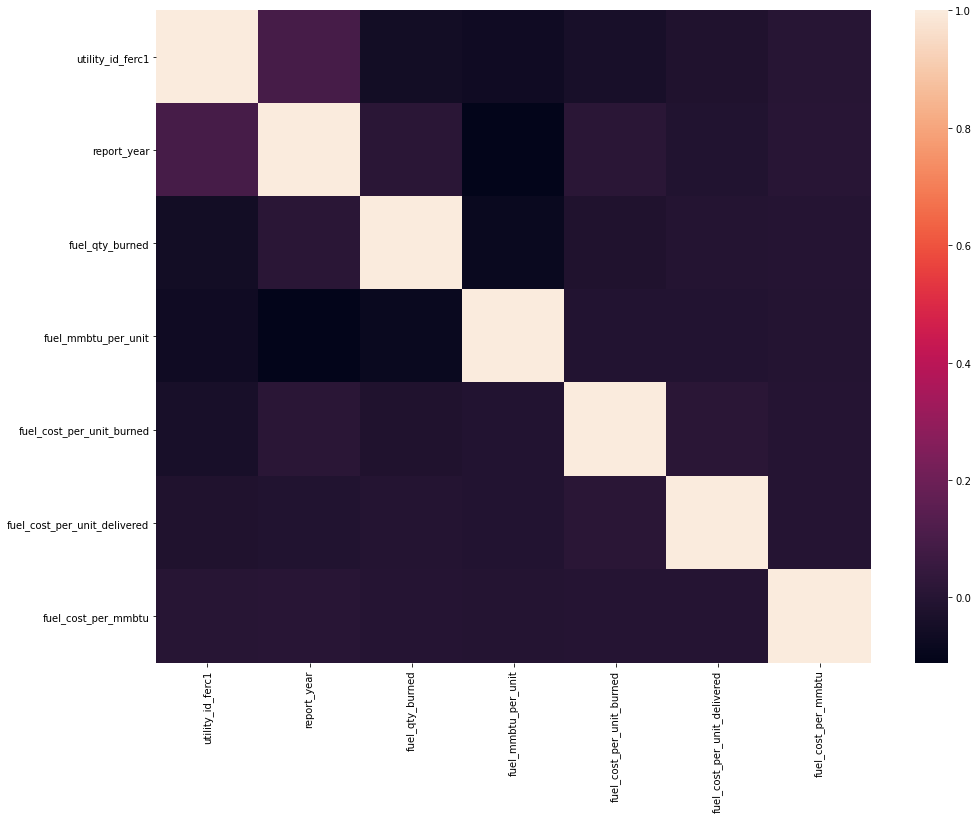

In [15]:
corr_fdata = fuel_data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_fdata);